In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Bài tập 1

In [2]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Extracting columns
    tv_data = get_column(data, 0)       
    radio_data = get_column(data, 1)     
    newspaper_data = get_column(data, 2) 
    sales_data = get_column(data, 3)     

    # Building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [3]:
# Question 1
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


### Bài tập 2

In [4]:
def implement_linear_regression(x_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = x_data[0][i]
            x2 = x_data[1][i]
            x3 = x_data[2][i]
            
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # Compute loss
            loss = compute_loss(y, y_hat)
            
            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            
            # Logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)


In [5]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

In [6]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [7]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

In [8]:
# Question 2
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [9]:
def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

In [10]:
# Question 3
l = compute_loss(y_hat =1, y =0.5)
print(l)

0.25


In [11]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

In [12]:
# Question 4
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [13]:
# Question 5
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [14]:
def update_weight_wi(wi, dl_dwi, lr):
    wi -= lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b -= lr * dl_db
    return b

In [15]:
# Question 6
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [16]:
# Question 7
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


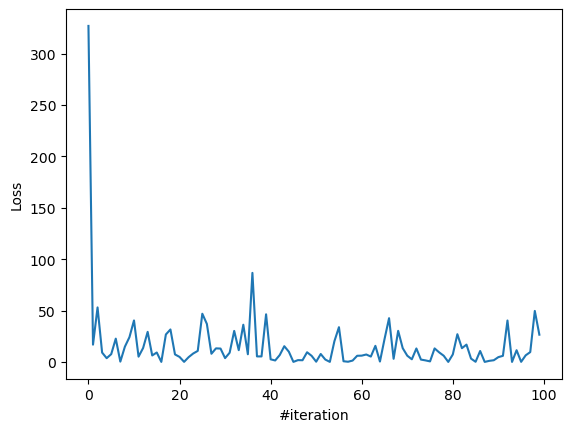

In [18]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [18]:
# Question 8
w1, w2, w3, b, losses = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [19]:
# Question 9
tv = 19.2
radio = 35.9
newspaper = 51.3

w1, w2, w3, b, losses = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales is {sales}')


Predicted sales is 8.176413319549823


In [20]:
# Question 10
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


### Bài 3

In [38]:
def implement_linear_regression_nsamples(x_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        # Initialize accumulators for loss and gradients
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = x_data[0][i]
            x2 = x_data[1][i]
            x3 = x_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing N samples
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Logging
        losses.append(loss_total / N)  # Average loss for the epoch

    return (w1, w2, w3, b, losses)

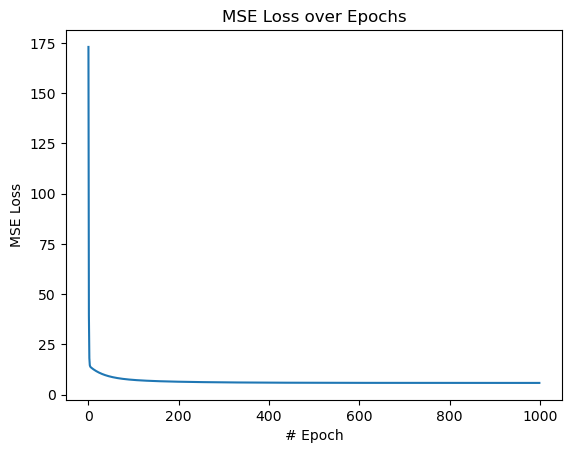

In [24]:
# Train linear regression model
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

# Print the losses

# Plot the MSE loss over epochs
plt.plot(losses)
plt.xlabel("# Epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Epochs")
plt.show()


In [25]:
# Question 11
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)


0.06710990754044266 0.15756173831487585 0.029619799386084403


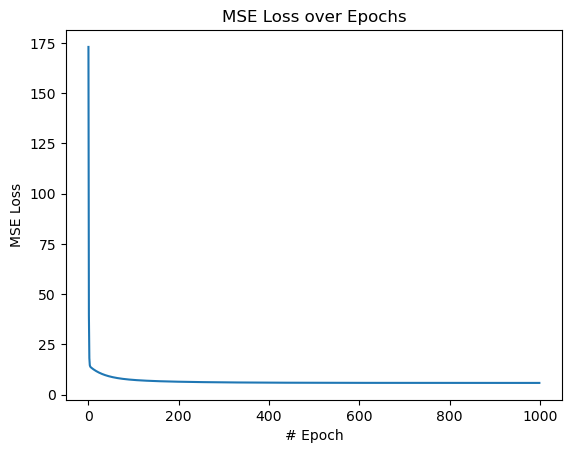

In [26]:

w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

plt.plot(losses)
plt.xlabel("# Epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Epochs")
plt.show()

### Bài tập 4

In [27]:
def prepare_data(file_name_dataset):
    # Load the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Get tv (index = 0)
    tv_data = get_column(data, 0)

    # Get radio (index = 1)
    radio_data = get_column(data, 1)

    # Get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # Get sales (index = 3)
    sales_data = get_column(data, 3)

    # Building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y

In [28]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # Comment this line for real application
    # return[bias, w1, w2, w3]
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]


In [36]:
def predict(x_features, weights):
    # Calculate the dot product of x_features and weights
    x_features = np.array(x_features)
    weights = np.array(weights)
    result = np.dot(x_features, weights)
    return result

def compute_loss(y_hat, y):
    # Calculate the squared loss
    return (y_hat - y) ** 2

# Compute gradient
def compute_gradient_w(x_features, y, y_hat):
    x_features = np.array(x_features)
    dl_dweights = 2*x_features*(y_hat - y)
    return dl_dweights

# Update weights
def update_weight(weights, dl_dweights, lr):
    weights = np.array(weights)
    dl_dweights = np.array(dl_dweights)
    weights = weights - lr*dl_dweights
    return weights

In [34]:
def implement_linear_regression(x_features, y_ouput, epoch_max = 50,lr = 1e-5):

  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
      print("epoch", epoch)
      for i in range(N):
          # get a sample - row i     
          features_i = x_features[i]
          y = y_ouput[i]
          
          # compute output 
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss) 
  return weights, losses

In [37]:
# Question 12
W,L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at interation 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.33922340810991
